In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from plotnine import *
import plotnine

%matplotlib inline

/cosma/home/dp004/dc-oles1/.local/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
grav = 'GR_b64n512'
NFW_f = 0.02

In [3]:
d = pd.read_csv("./output/result.nfw.csv")\
    .dropna()

In [4]:
_d = d[
    (d['grav'] == grav) &
    (d['f'] == NFW_f)
]

x, y = _d['rho_f'], _d['rho_s']

In [5]:
def f_0(x, a):
    return a + x

popt_0, _ = curve_fit(f_0, x, y)

print(sum((f_0(x, *popt_0) - y)**2.0) / float(len(y) - len(popt_0)))

0.0044790901899


In [6]:
def f_1(x, a, b):
    return a + b*x

popt_1, _ = curve_fit(f_1, x, y)

print(sum((f_1(x, *popt_1) - y)**2.0) / float(len(y) - len(popt_1)))

0.00376080460876


In [7]:
def f_2(x, a, b, c):
    return a + b*x + c*x*x

popt_2, _ = curve_fit(f_2, x, y)

print(sum((f_2(x, *popt_2) - y)**2.0) / float(len(y) - len(popt_2)))

0.00379257952503


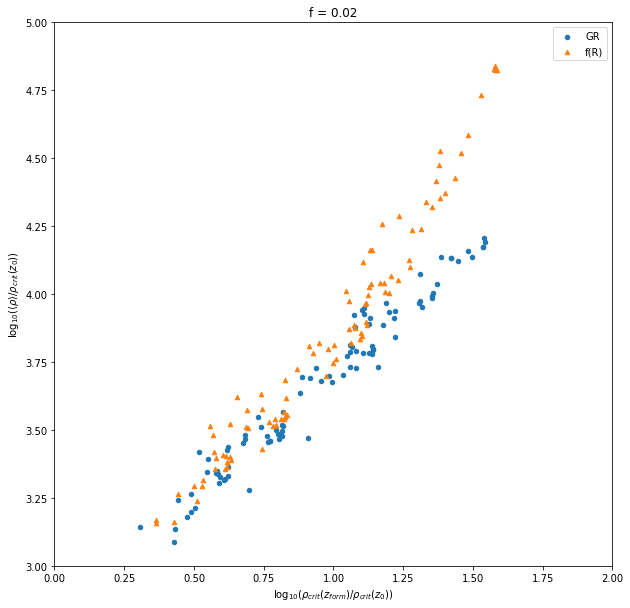

In [8]:
fig, ax = plt.subplots(1, figsize=(10, 10))

d[
    (d['grav'] == 'GR_b64n512') &
    (d['f'] == NFW_f)]\
.plot(ax=ax, kind='scatter', x='rho_f', y='rho_s', marker='o', c='C0', label='GR')

d[
    (d['grav'] == 'fr6_b64n512') &
    (d['f'] == NFW_f)]\
.plot(ax=ax, kind='scatter', x='rho_f', y='rho_s', marker='^', c='C1', label='f(R)')

# ax.plot(np.linspace(0, 2), f_0(np.linspace(0, 2), np.log10(400)), label='C=400', c='C2')
# ax.plot(np.linspace(0, 2), f_0(np.linspace(0, 2), *popt_0), label='C=%d' % 10**popt_0[0], c='C3')
# ax.plot(np.linspace(0, 2), f_1(np.linspace(0, 2), *popt_1), label='ax+b', c='C2')

ax.set_title(r"f = %0.2f" % NFW_f)
ax.set_xlim((0, 2))
ax.set_ylim((3, 5))
ax.set_ylabel(r"$\log_{10}(\langle\rho\rangle / \rho_{crit}(z_0))$")
ax.set_xlabel(r"$\log_{10}(\rho_{crit} (z_{form}) / \rho_{crit}(z_0))$")
_ = ax.legend()

# plt.savefig("./fig_00.pdf")

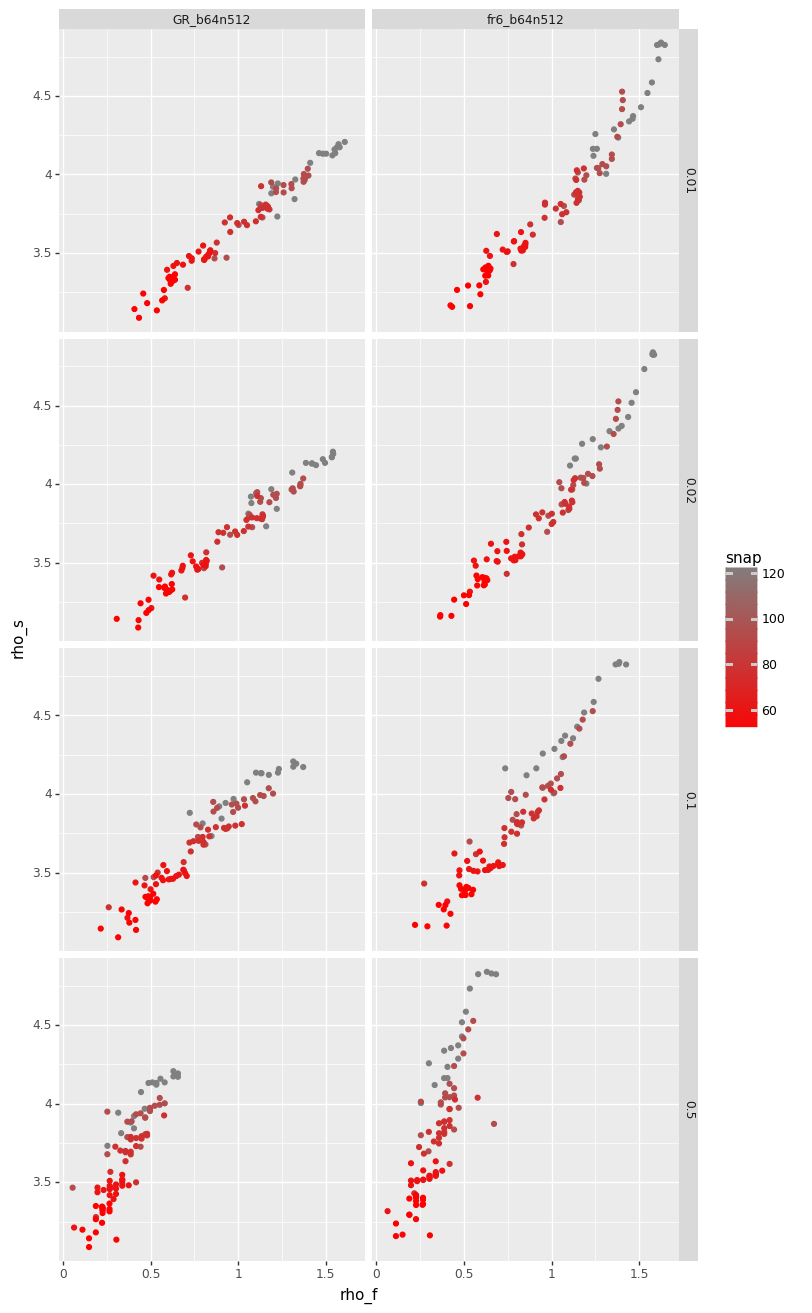

In [9]:
plotnine.options.figure_size = 8, 16

g = ggplot(
    d,
    aes(
        x='rho_f',
        y='rho_s',
    )) +\
    geom_point(aes(
        color='snap',
#         size='bin',
#         shape='grav',
    )) +\
    scale_color_desaturate() +\
    facet_grid(['f', 'grav'])

_ = g.draw()